# 隨機森林 - Iris

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1.載入Iris資料集並觀察

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [7]:
X = iris.data
Y = iris.target

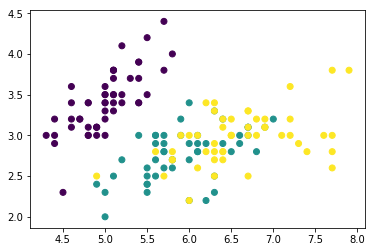

In [8]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [9]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
X = X[:,2:]

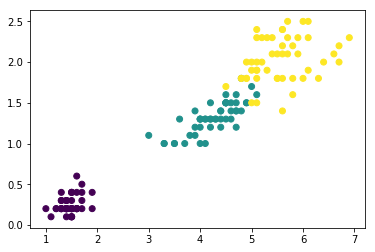

In [11]:
plt.scatter(X[:,0], X[:,1], c=Y)

## 2. 分割資料，產生訓練組與測試組

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#用0.2:0.8分組
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=329) 

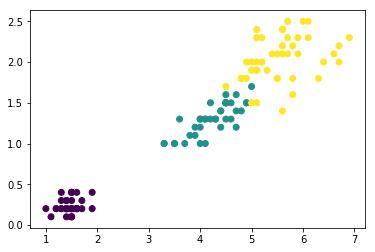

In [14]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

## 3. ~~走進森林囉!~~訓練模型並嘗試預測啦

In [53]:
from sklearn import ensemble, metrics
from sklearn.ensemble import RandomForestClassifier

In [54]:
clf = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=1000)

In [55]:
# 可以看要動甚麼參數
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [56]:
# 預測囉!
y_predict = clf.predict(x_test)

## 4. 結果如何咧

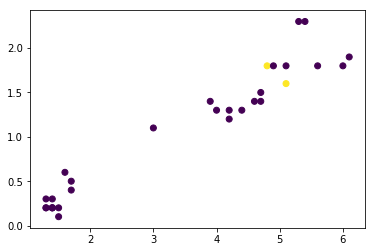

In [57]:
# 看看分類結果
plt.scatter(x_test[:,0], x_test[:,1], c=y_predict-y_test)

In [58]:
# 準確率怎麼樣
accuracy = metrics.accuracy_score(y_test, y_predict)

print(accuracy)

0.933333333333


In [60]:
# 到底是哪裡分類錯誤 >> 混淆矩陣
from sklearn.metrics import confusion_matrix 

In [61]:
confusion_matrix(y_test, y_predict)

array([[12,  0,  0],
       [ 0,  9,  2],
       [ 0,  0,  7]], dtype=int64)

In [62]:
# 比較可愛的CM
pd.DataFrame(confusion_matrix(y_test, y_predict), columns = iris.target_names, index = iris.target_names)

,setosa,versicolor,virginica
setosa,12,0,0
versicolor,0,9,2
virginica,0,0,7
